In [11]:
import numpy as np
import sys
sys.path.append('./ckplotlib/')
import map_funcs
from IPython.display import Image
#
import xarray as xr
import xesmf as xe
import smoothlib

In [2]:
models_list = (
    'CanESM5',
    'CESM2',
    'CNRM-ESM2-1',
    'GISS-E2-1-G'
    )

exps_list = ('piControl','1pctco2-bgc','1pctco2')

vars_list = ('tas','fgco2','netAtmosLandCO2Flux')

nmodels = len(models_list)
nvars = len(vars_list)
nexps = len(exps_list)

file_master_list_dynamics = [[[[] for i in range(nexps )] for j in range(nvars)] for k in range(nmodels)]
### index this file as [model_i][var_i][exp_i]

y_4xco2 = 140
t_4xco2 = y_4xco2*12-1


regrid_lons = np.arange(-179.5,180.5,1.)
regrid_lats = np.arange(-89.5,90.5,1.)

# make a dataset on the new grid
ds_out = xr.Dataset({'lat': (['lat'], regrid_lats),
                     'lon': (['lon'], regrid_lons),
                    })



In [3]:
### load all the files for CESM2

model_i = models_list.index('CESM2')

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('piControl')] = [
    'tas_Amon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
    'tas_Amon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2-bgc')] = [
    'tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
    'tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
    'tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2')] = [
    'tas_Amon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
    'tas_Amon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
    'tas_Amon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('piControl')] = [
    'netAtmosLandCO2Flux_Emon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
    'netAtmosLandCO2Flux_Emon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2-bgc')] = [
    'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
    'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
    'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2')] = [
    'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
    'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
    'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('piControl')] = [
    'fgco2_Omon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
    'fgco2_Omon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2-bgc')] = [
    'fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
    'fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
    'fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2')] = [
    'fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
    'fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
    'fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'
]

In [4]:
### load all the files for CanESM5

model_i = models_list.index('CanESM5')

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('piControl')] = [
'tas_Amon_CanESM5_piControl_r1i1p1f1_gn_520101-540012.nc',
'tas_Amon_CanESM5_piControl_r1i1p1f1_gn_540101-560012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2-bgc')] = [
'tas_Amon_CanESM5_1pctCO2-bgc_r1i1p1f1_gn_185001-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2')] = [
'tas_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('piControl')] = [
'netAtmosLandCO2Flux_Emon_CanESM5_piControl_r1i1p1f1_gn_520101-540012.nc',
'netAtmosLandCO2Flux_Emon_CanESM5_piControl_r1i1p1f1_gn_540101-560012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2-bgc')] = [
'netAtmosLandCO2Flux_Emon_CanESM5_1pctCO2-bgc_r1i1p1f1_gn_185001-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2')] = [
'netAtmosLandCO2Flux_Emon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('piControl')] = [
'fgco2_Omon_CanESM5_piControl_r1i1p1f1_gn_520101-540012.nc',
'fgco2_Omon_CanESM5_piControl_r1i1p1f1_gn_540101-560012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2-bgc')] = [
'fgco2_Omon_CanESM5_1pctCO2-bgc_r1i1p1f1_gn_185001-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2')] = [
'fgco2_Omon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc'
]

In [5]:
### load all the files for GISS-E2-1-G

model_i = models_list.index('GISS-E2-1-G')

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('piControl')] = [
'tas_Amon_GISS-E2-1-G_piControl_r1i1p1f1_gn_415001-420012.nc',
'tas_Amon_GISS-E2-1-G_piControl_r1i1p1f1_gn_420101-425012.nc',
'tas_Amon_GISS-E2-1-G_piControl_r1i1p1f1_gn_425101-430012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2-bgc')] = [
'tas_Amon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_185001-190012.nc',
'tas_Amon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_190101-195012.nc',
'tas_Amon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_195101-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2')] = [
'tas_Amon_GISS-E2-1-G_1pctCO2_r1i1p1f1_gn_185001-190012.nc',
'tas_Amon_GISS-E2-1-G_1pctCO2_r1i1p1f1_gn_190101-195012.nc',
'tas_Amon_GISS-E2-1-G_1pctCO2_r1i1p1f1_gn_195101-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('piControl')] = [
'nbp_Lmon_GISS-E2-1-G_piControl_r101i1p1f1_gn_185001-190012.nc',
'nbp_Lmon_GISS-E2-1-G_piControl_r101i1p1f1_gn_190101-195012.nc',
'nbp_Lmon_GISS-E2-1-G_piControl_r101i1p1f1_gn_195101-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2-bgc')] = [
'nbp_Lmon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_185001-190012.nc',
'nbp_Lmon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_190101-195012.nc',
'nbp_Lmon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_195101-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2')] = [
'nbp_Lmon_GISS-E2-1-G_1pctCO2_r101i1p1f1_gn_185001-190012.nc',
'nbp_Lmon_GISS-E2-1-G_1pctCO2_r101i1p1f1_gn_190101-195012.nc',
'nbp_Lmon_GISS-E2-1-G_1pctCO2_r101i1p1f1_gn_195101-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('piControl')] = [
'fgco2_Omon_GISS-E2-1-G_piControl_r101i1p1f1_gn_185001-190012.nc',
'fgco2_Omon_GISS-E2-1-G_piControl_r101i1p1f1_gn_190101-195012.nc',
'fgco2_Omon_GISS-E2-1-G_piControl_r101i1p1f1_gn_195101-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2-bgc')] = [
'fgco2_Omon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_185001-190012.nc',
'fgco2_Omon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_190101-195012.nc',
'fgco2_Omon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_195101-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2')] = [
'fgco2_Omon_GISS-E2-1-G_1pctCO2_r101i1p1f1_gn_185001-190012.nc',
'fgco2_Omon_GISS-E2-1-G_1pctCO2_r101i1p1f1_gn_190101-195012.nc',
'fgco2_Omon_GISS-E2-1-G_1pctCO2_r101i1p1f1_gn_195101-200012.nc'
]

In [6]:
### load all the files for CNRM-ESM2-1
model_i = models_list.index('CNRM-ESM2-1')

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('piControl')] = [
'tas_Amon_CNRM-ESM2-1_piControl_r1i1p1f2_gr_185001-234912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2-bgc')] = [
'tas_Amon_CNRM-ESM2-1_1pctCO2-bgc_r1i1p1f2_gr_185001-198912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2')] = [
'tas_Amon_CNRM-ESM2-1_1pctCO2_r1i1p1f2_gr_185001-199912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('piControl')] = [
'netAtmosLandCO2Flux_Emon_CNRM-ESM2-1_piControl_r1i1p1f2_gr_185001-234912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2-bgc')] = [
'netAtmosLandCO2Flux_Emon_CNRM-ESM2-1_1pctCO2-bgc_r1i1p1f2_gr_185001-198912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2')] = [
'netAtmosLandCO2Flux_Emon_CNRM-ESM2-1_1pctCO2_r1i1p1f2_gr_185001-199912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('piControl')] = [
'fgco2_Omon_CNRM-ESM2-1_piControl_r1i1p1f2_gn_185001-234912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2-bgc')] = [
'fgco2_Omon_CNRM-ESM2-1_1pctCO2-bgc_r1i1p1f2_gn_185001-198912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2')] = [
'fgco2_Omon_CNRM-ESM2-1_1pctCO2_r1i1p1f2_gn_185001-199912.nc'
]

/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


Reuse existing file: nearest_s2d_64x128_180x360.nc
 


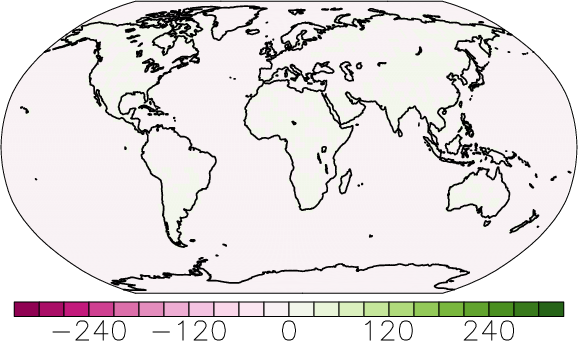

Reuse existing file: nearest_s2d_64x128_180x360.nc


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


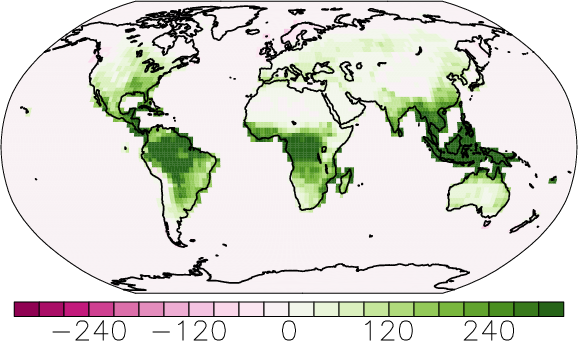

Reuse existing file: nearest_s2d_64x128_180x360.nc


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


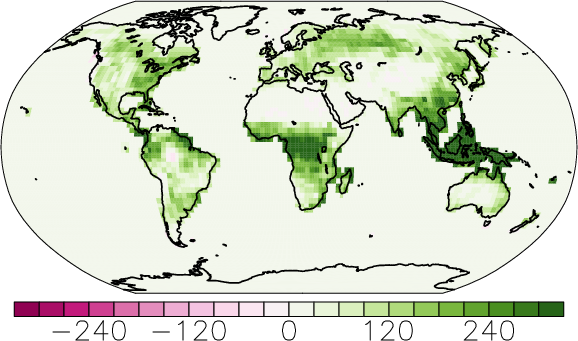

Reuse existing file: nearest_s2d_192x288_180x360.nc


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'netAtmosLandCO2Flux' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  co

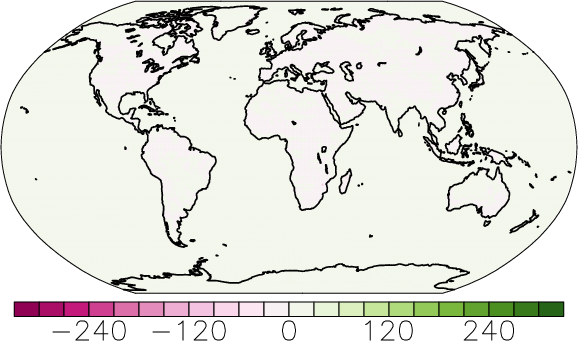

Reuse existing file: nearest_s2d_192x288_180x360.nc


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'netAtmosLandCO2Flux' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  co

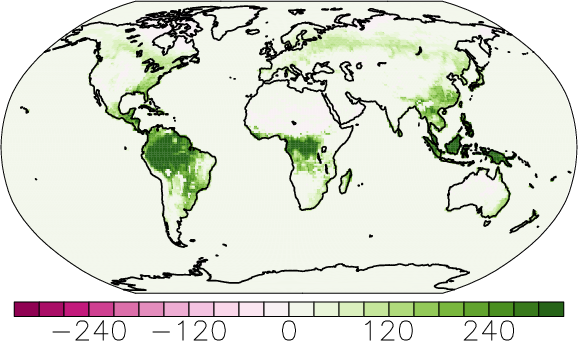

Reuse existing file: nearest_s2d_192x288_180x360.nc


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'netAtmosLandCO2Flux' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  co

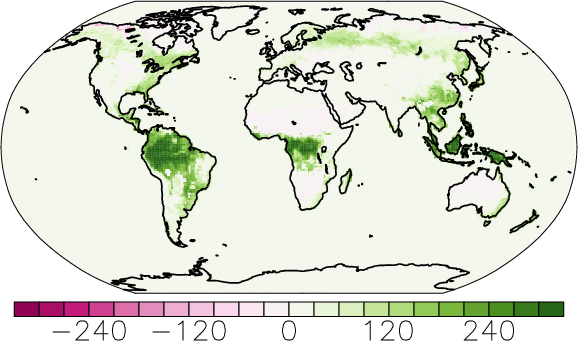

Create weight file: nearest_s2d_128x256_180x360.nc


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/coding/times.py:431: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/coding/times.py:431: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray ve

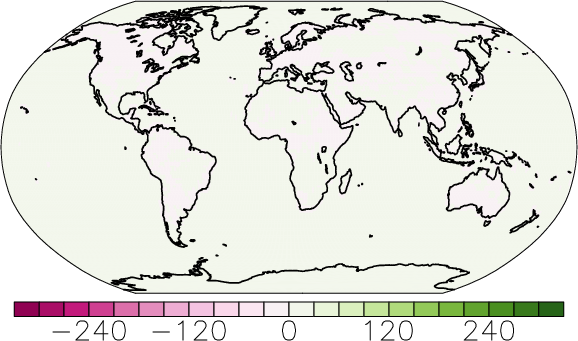

/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


Reuse existing file: nearest_s2d_128x256_180x360.nc
 


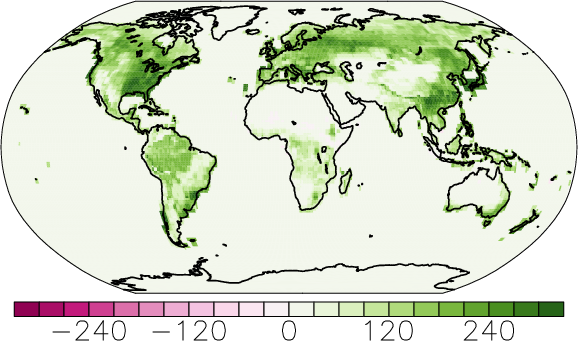

/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


Reuse existing file: nearest_s2d_128x256_180x360.nc
 


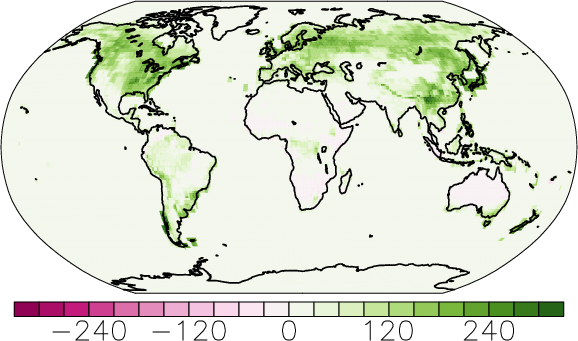

/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


Create weight file: nearest_s2d_90x144_180x360.nc
 


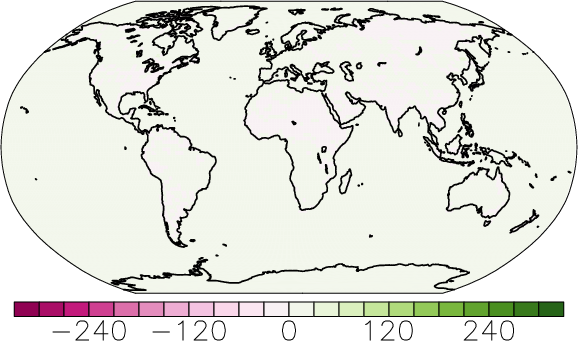

/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


Reuse existing file: nearest_s2d_90x144_180x360.nc
 


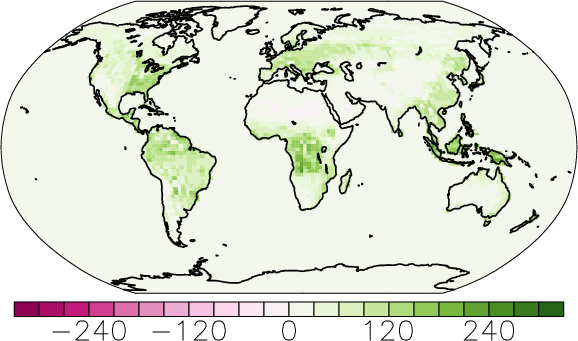

/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


Reuse existing file: nearest_s2d_90x144_180x360.nc
 


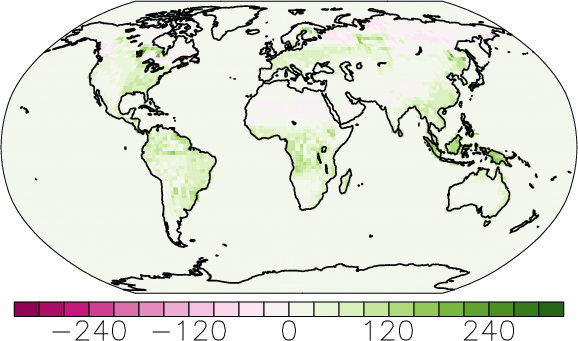

In [7]:
### load netAtmosLandCO2Flux for all models
i_var = vars_list.index('netAtmosLandCO2Flux')
for model_i in range(nmodels):
    for exp_i in range(nexps):
        dataset = xr.open_mfdataset(file_master_list_dynamics[model_i][i_var][exp_i])
        #dataset = dataset.rename_vars({'lat_bnds': 'lat_b', 'lon_bnds': 'lon_b'})
        regridder = xe.Regridder(dataset, ds_out, 'nearest_s2d', reuse_weights=True)
        try:
            netAtmosLandCO2Flux = dataset['netAtmosLandCO2Flux']
        except:
            netAtmosLandCO2Flux = dataset['nbp']
        integrated_landco2flux = netAtmosLandCO2Flux.cumsum(axis=0)[t_4xco2,:,:] * 86400. * 365.
        map_funcs.fill(regridder(integrated_landco2flux).data[:], regrid_lats, regrid_lons, showjupyter=True, levels=np.arange(-300.,330.,30.), colormap='MPL_PiYG', projection='Robinson')
            

In [8]:
netAtmosLandCO2Flux

<xarray.DataArray 'nbp' (time: 1812, lat: 90, lon: 144)>
dask.array<shape=(1812, 90, 144), dtype=float32, chunksize=(612, 90, 144)>
Coordinates:
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) object 1850-01-16 12:00:00 ... 2000-12-16 12:00:00
Attributes:
    standard_name:  surface_net_downward_mass_flux_of_carbon_dioxide_expresse...
    long_name:      Carbon Mass Flux out of Atmosphere due to Net Biospheric ...
    comment:        This is the net mass flux of carbon from atmosphere into ...
    units:          kg m-2 s-1
    cell_methods:   area: mean where land time: mean
    cell_measures:  area: areacella

In [9]:
integrated_landco2flux.data[:]

dask.array<mul, shape=(90, 144), dtype=float32, chunksize=(90, 144), chunktype=numpy.ndarray>

In [12]:
dataset

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 1812)
Coordinates:
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) object 1850-01-16 12:00:00 ... 2000-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<shape=(1812, 2), chunksize=(612, 2)>
    lat_bnds   (time, lat, bnds) float64 dask.array<shape=(1812, 90, 2), chunksize=(612, 90, 2)>
    lon_bnds   (time, lon, bnds) float64 dask.array<shape=(1812, 144, 2), chunksize=(612, 144, 2)>
    nbp        (time, lat, lon) float32 dask.array<shape=(1812, 90, 144), chunksize=(612, 90, 144)>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                1 percent per year increase in CO2 to

In [13]:
smoothlib.monthly_to_annual(netAtmosLandCO2Flux)

TypeError: unhashable type: 'list'

In [14]:
netAtmosLandCO2Flux.shape

(1812, 90, 144)

In [15]:
b = netAtmosLandCO2Flux*5.

In [16]:
b


<xarray.DataArray 'nbp' (time: 1812, lat: 90, lon: 144)>
dask.array<shape=(1812, 90, 144), dtype=float32, chunksize=(612, 90, 144)>
Coordinates:
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) object 1850-01-16 12:00:00 ... 2000-12-16 12:00:00

In [20]:
b.max()

<xarray.DataArray 'nbp' ()>
dask.array<shape=(), dtype=float32, chunksize=()>